## Statistics: The Science of Decisions Project Instructions

### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <font color="red">RED</font>,  <font color="blue">BLUE</font>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <font color="green">PURPLE</font>, <font color="purple">ORANGE</font>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### Questions For Investigation

#### 1. What is our independent variable? What is our dependent variable?

The independent variable is the "words condition" (congruent or incongruent) and the dependent variable is the time it takes to name the ink colors.

#### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The statistical test I'm goin to use is a T-Test for two dependent variables. Variables are paired the same subject (reader) take the test twice with two different conditions (congruent and incongruent), which make the two variables dependent.

We want to decide if the mean reading time for the population with a congruent test is significantly different to the mean reading time for the population with a incongruent test. Being **xc** the mean for the congruent sample and **xi** the mean for the incongruent sample, we use them to infer the means of the respective populations. Our null hipothesis is that both are similar (there is no change given that the list of words is congruent or incongruent), and the alternative hipothesis is that both means are significantly different.

**Ho: xc == xi**

**Ha: xc != xi**  ==> we will use a two-tailed dependent t-test because we want to know if one of the means is significantly bigger or smaller than the other one

#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [1]:
import pandas as pd

df = pd.read_csv("stroopdata.csv")

In [2]:
print "MEASURES OF CENTRAL TENDENCY"
print "* Mean:"
print df.mean()
print "* Median:"
print df.median()

MEASURES OF CENTRAL TENDENCY
* Mean:
Congruent      14.051125
Incongruent    22.015917
dtype: float64
* Median:
Congruent      14.3565
Incongruent    21.0175
dtype: float64


In [3]:
print "MEASURES OF VARIABILITY"
print "* Sample Standard Deviation:"
print df.std()
print "* Variance:"
print df.var()

MEASURES OF VARIABILITY
* Sample Standard Deviation:
Congruent      3.559358
Incongruent    4.797057
dtype: float64
* Variance:
Congruent      12.669029
Incongruent    23.011757
dtype: float64


In [4]:
import numpy

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print "INTER QUARTILE RANGE:"
print IQR
print "\nRANGE:"
print "Congruent: ",df['Congruent'].max() - df['Congruent'].min()
print "Incongruent: ",df['Incongruent'].max() - df['Incongruent'].min()

print "\nCalculating num of outliers:"
print "WE HAVE TWO OUTLIERS IN THE CONGRUENT CASE:"
out_min_c = Q1['Congruent']-1.5*IQR['Congruent']
out_min_i = Q1['Incongruent']-1.5*IQR['Incongruent']
out_max_c = Q3['Congruent']+1.5*IQR['Congruent']
out_max_i = Q3['Incongruent']+1.5*IQR['Incongruent']

outliers_c = pd.Series(df['Congruent'] < out_min_c) | (df['Congruent'] > out_max_c)
print "outliers Congruent", outliers_c.sum()
outliers_i = pd.Series(df['Incongruent'] < out_min_i) | (df['Incongruent'] > out_max_i)
print "outliers Incongruent", outliers_i.sum()

print "\n***The outliers are discarded from the study"
df_final = df[df['Incongruent'] < out_max_i].copy()
print df_final

INTER QUARTILE RANGE:
Congruent      4.30550
Incongruent    5.33475
dtype: float64

RANGE:
Congruent:  13.698
Incongruent:  19.568

Calculating num of outliers:
WE HAVE TWO OUTLIERS IN THE CONGRUENT CASE:
outliers Congruent 0
outliers Incongruent 2

***The outliers are discarded from the study
    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1090f1dd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1091fff50>]], dtype=object)

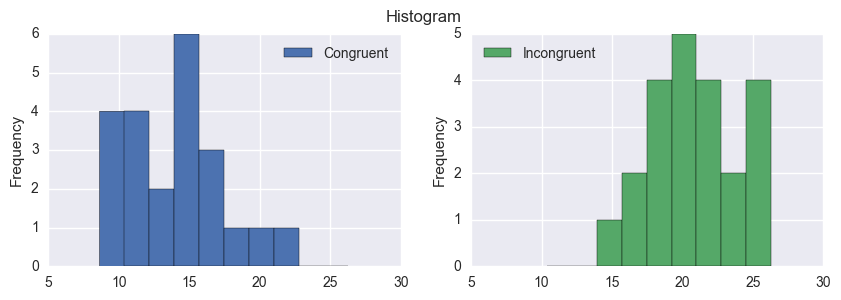

In [5]:
%matplotlib inline
import seaborn as sns
df_final.plot.hist(bins=10,figsize=(10,3),subplots=True, layout=(1,2), title="Histogram")

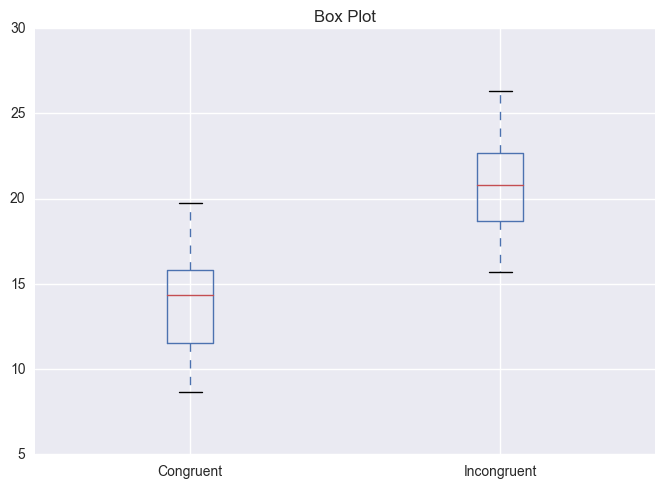

In [6]:
df_final.plot.box(title="Box Plot")

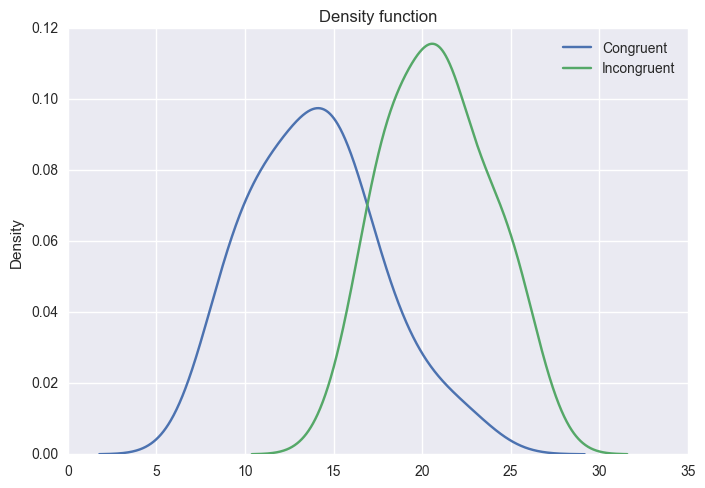

In [7]:
df_final.plot.density(title="Density function")

The values for the Congruent condition are clearly lower than those from the Incongruent condition. The Congruent values distribution is slightly positively skewed, while the Incongruent values one is a little bit more centered and less spread distribution.

#### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [8]:
import math
# sample size, dF = 21
n = len(df_final)
print "sample size:",n
# mean of the differences
xD = (df_final['Congruent']-df_final['Incongruent']).mean()
print "xD:",xD
# standard deviation of the difference
sD = math.sqrt((((df_final['Congruent']-df_final['Incongruent'])-xD)**2).sum()/(n-1))
#sD = math.sqrt(df_final['Congruent'].var() + df_final['Incongruent'].var())
#sD = 0.725
print "sD:",sD
# t-statistic
t_statistic = xD / (sD/math.sqrt(n))
print "t_statistic",t_statistic

sample size: 22
xD: -6.91731818182
sD: 3.40056162569
t_statistic -9.54109990849


In [9]:
# for a probability of 95% we get the t_critical for two tails of 0.025 
t_c = 2.080
interv_1 = xD - t_c * (sD/math.sqrt(n))
print "interv_1:",interv_1
interv_2 = xD + t_c * (sD/math.sqrt(n))
print "interv_2:",interv_2

interv_1: -8.425322705
interv_2: -5.40931365863


**RESULTS**

Two-sample t-test, samples are dependent.

Degrees of freedom 21

P-value < 0.00025  => We reject the null

Two tailed test.

Mean of the difference is -6.917 with a **Confidence interval (95%) = (-8.425,-5.409)**

The t statistic value is -9.541, which for a two-tail test means a P value less than 0.00025.
This P value is statistically significant, and therefore, we reject the null Ho, meaning that the two samples are statistically different. The results for the incongruent experiment are statistically bigger than the results for the congruent experiment. These results were expected, given the difficulty I experienced myself reading the incongruent list.

#### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

There are several theories, I think that the idea of the brain reading automatically words faster than recognizing colors is a fair explanation. 

Apparently there is a numerical test for trying to compare two numbers that have different sizes, sizes are recognizable faster by the brain than the value of the number and it is more difficult to recognize a higher number when its size is smaller than the lower number. Probably the results of a test where first the lower number is smaller, and then the lower number is bigger in size than the higher, would have similar results.  

## References
* http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame
* https://docs.python.org/2/library/math.html
* https://docs.python.org/2/library/functions.html
* https://en.wikipedia.org/wiki/Stroop_effect